<a href="https://colab.research.google.com/github/MariaVlasenkova/repo-PNM/blob/main/LAB4_2_mz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
from PIL import Image
from pylab import *

In [2]:
#исходное изображение

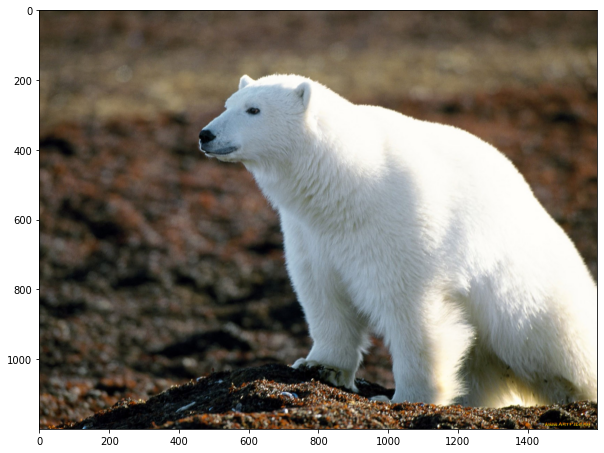

In [3]:
img = Image.open('beer.jpg')
plt.figure(figsize = (10,15))
plt.imshow(img)

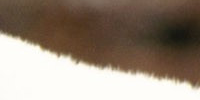

In [4]:
# делаем crop части картинки
cropped = array(img)[250:350, 1000:1200]
display(Image.fromarray(cropped))

In [5]:
# задание 1. Для изображения применить поворот, растяжение и сжатие, скос, измение цвета, изменение яркости, размытие, изменение резкости

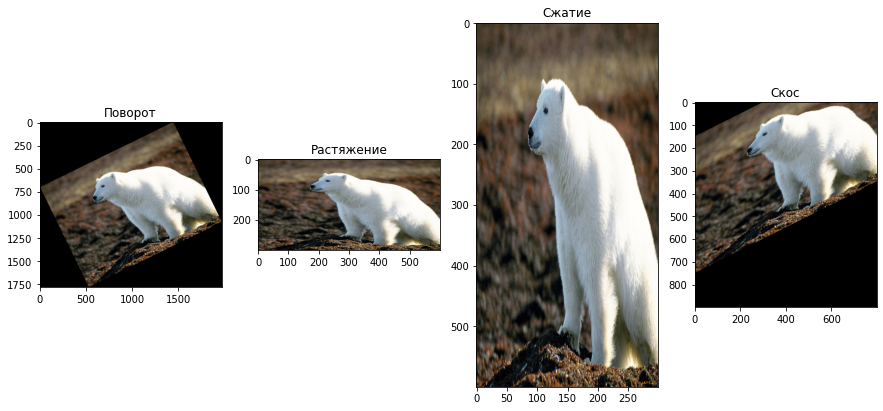

In [6]:
# поворот, растяжение, сжатие, скос

img_rotate = img.rotate(26,  expand = 1)
img_rast = cv2.resize(array(img), (600, 300))
img_sj = cv2.resize(array(img), (300, 600))
im_skos = img.transform((800,900),Image.AFFINE, (2,0,0,1,2,-300))

plt.figure(figsize=(15, 10))
subplot(1,4,1), imshow(img_rotate)
title('Поворот')
subplot(1,4,2), imshow(img_rast)
title('Растяжение')
subplot(1,4,3), imshow(img_sj)
title('Сжатие')
subplot(1,4,4), imshow(im_skos)
title('Скос')
show()


In [7]:
# измение цвета, изменение яркости, размытие, изменение резкости


In [8]:
img0 = array(Image.open('beer.jpg'))
im2=zeros(img0.shape)
for i in range(2060):
  for j in range(1695):
    a = img0[i, j][0] + 50
    b = img0[i, j][1] + 50
    c = img0[i, j][2] + 50
    if (a < 0):
      a = 0
    if (b < 0):
      b = 0
    if (c < 0):
      c = 0
    if (a > 255):
      a = 255
    if (b > 255):
      b = 255
    if (c > 255):
      c = 255
    im2[i, j][0] = a
    im2[i, j][1] = b
    im2[i, j][2] = c
im2 = im2.astype('uint8')
img55 = cv2.cvtColor(array(img), cv2.COLOR_RGB2HLS)



plt.figure(figsize=(15, 10))
subplot(1,2,1), imshow(im2)
title('Изменение яркости')
subplot(1,2,2), imshow(img55)
title('Изменение цвета')
show()

IndexError: ignored

In [9]:
#Различные способы размытия:

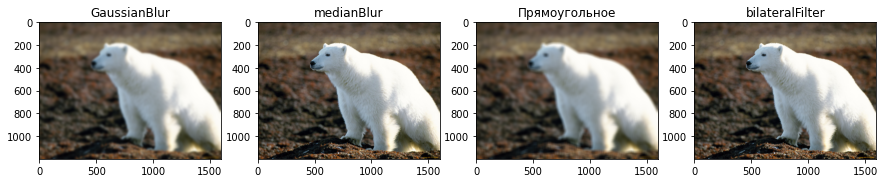

In [10]:
blur1 = cv2.GaussianBlur(array(img), (51, 51), 0)
blur2 = cv2.medianBlur(array(img),5)
blur3 = cv2.blur(array(img),(30,30)) # прямоугоьное 
blur4 = cv2.bilateralFilter(array(img),9,75,75)
plt.figure(figsize=(15, 10))
subplot(1,4,1), imshow(blur1)
title('GaussianBlur')
subplot(1,4,2), imshow(blur2)
title('medianBlur')
subplot(1,4,3), imshow(blur3)
title('Прямоугольное')
subplot(1,4,4), imshow(blur4)
title('bilateralFilter')
show()

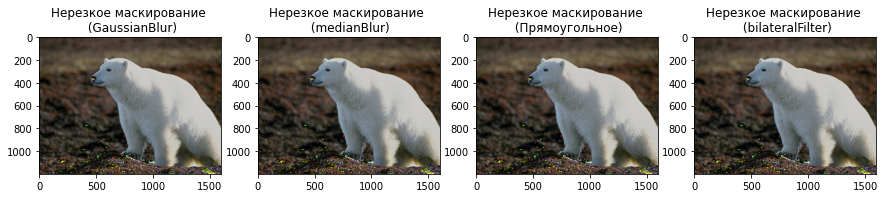

In [11]:
res1 = img - 0.2*blur1
res1 = uint8(res1)
res2 = img - 0.2*blur2
res2 = uint8(res1)
res3 = img - 0.2*blur3
res3 = uint8(res1)
res4 = img - 0.2*blur4
res4 = uint8(res1)
plt.figure(figsize=(15, 10))
subplot(1,4,1), imshow(res1)
title('Нерезкое маскирование \n (GaussianBlur)')
subplot(1,4,2), imshow(res2)
title('Нерезкое маскирование \n (medianBlur)')
subplot(1,4,3), imshow(res3)
title('Нерезкое маскирование \n (Прямоугольное)')
subplot(1,4,4), imshow(res4)
title('Нерезкое маскирование \n (bilateralFilter)')
show()

In [12]:
from scipy.ndimage import filters

In [13]:
#detector Харриса

In [14]:
def harris_response(im,sigma=3):
  imx = zeros(im.shape)
  filters.gaussian_filter(im,(sigma, sigma), (0,1), imx)
  imy = zeros(im.shape)
  filters.gaussian_filter(im, (sigma, sigma), (1,0), imy)
  ixx = filters.gaussian_filter(imx*imx, sigma)
  ixy = filters.gaussian_filter(imx*imy, sigma)
  iyy = filters.gaussian_filter(imy*imy, sigma)
  idet = ixx*iyy - ixy**2
  itr = ixx+iyy

  return np.nan_to_num(idet/itr)

In [15]:
def harris_point(him, mind, p):
  p_corner = him.max()*p
  t = 1*(him > p_corner)
  coords = array(t.nonzero()).T
  v = [him[c[0],c[1]] for c in coords]
  index = argsort(v)
  mas = zeros(him.shape)
  j=-mind
  mas[mind:j,mind:j] = 1
  coords2 = []
  for i in index:
    if mas[coords[i,0], coords[i,1]] == 1:
      coords2.append(coords[i])
      mas[(coords[i,0]- mind):(coords[i,0]+mind), (coords[i,1]-mind): (coords[i,1]-mind)]=0
  return coords2

In [16]:
def hplot(im, coords2):
  figure()
  imshow(im, cmap="gray")
  plot([p[1] for p in coords2], [p[0] for p in coords2], 'r+')
  axis("off")
  show()

<ipython-input-14-fb88004876ab>:3: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  filters.gaussian_filter(im,(sigma, sigma), (0,1), imx)
<ipython-input-14-fb88004876ab>:5: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  filters.gaussian_filter(im, (sigma, sigma), (1,0), imy)
<ipython-input-14-fb88004876ab>:6: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  ixx = filters.gaussian_filter(imx*imx, sigma)
<ipython-input-14-fb88004876ab>:7: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  ixy = filters.gaussian_filter(imx*imy, sigma)
<ipython-input-14-fb88004876ab>:8: DeprecationWarning: Please use `gaussian_filter` from the `sci

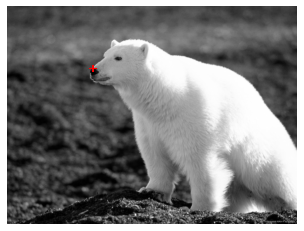

In [17]:
im = array(Image.open("beer.jpg").convert('L'))
him = harris_response(im)
coords = harris_point(him, 200, 0.3)

hplot(im,coords)

In [18]:
len(coords)

12

<ipython-input-14-fb88004876ab>:3: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  filters.gaussian_filter(im,(sigma, sigma), (0,1), imx)
<ipython-input-14-fb88004876ab>:5: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  filters.gaussian_filter(im, (sigma, sigma), (1,0), imy)
<ipython-input-14-fb88004876ab>:6: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  ixx = filters.gaussian_filter(imx*imx, sigma)
<ipython-input-14-fb88004876ab>:7: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  ixy = filters.gaussian_filter(imx*imy, sigma)
<ipython-input-14-fb88004876ab>:8: DeprecationWarning: Please use `gaussian_filter` from the `sci

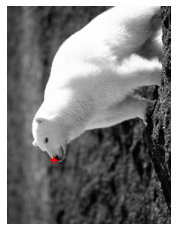

In [19]:
import PIL
im = Image.open("beer.jpg")
white = (150,150,150)
img_rotate = im.rotate(90,  expand = 1)
im = array(img_rotate.convert('L'))
him = harris_response(im)
coords7 = harris_point(him, 200, 0.3)
hplot(im,coords7)

In [20]:
len(coords7)

12

<ipython-input-14-fb88004876ab>:3: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  filters.gaussian_filter(im,(sigma, sigma), (0,1), imx)
<ipython-input-14-fb88004876ab>:5: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  filters.gaussian_filter(im, (sigma, sigma), (1,0), imy)
<ipython-input-14-fb88004876ab>:6: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  ixx = filters.gaussian_filter(imx*imx, sigma)
<ipython-input-14-fb88004876ab>:7: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  ixy = filters.gaussian_filter(imx*imy, sigma)
<ipython-input-14-fb88004876ab>:8: DeprecationWarning: Please use `gaussian_filter` from the `sci

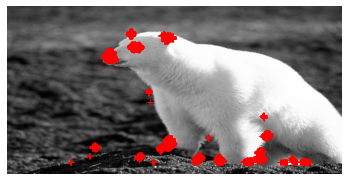

In [21]:
img_rast = cv2.resize(array(img.convert('L')), (600, 300))
him2 = harris_response(img_rast)
coords2 = harris_point(him2, 20, 0.3)
hplot(img_rast,coords2)

In [22]:
len(coords2)

1972

<ipython-input-14-fb88004876ab>:3: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  filters.gaussian_filter(im,(sigma, sigma), (0,1), imx)
<ipython-input-14-fb88004876ab>:5: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  filters.gaussian_filter(im, (sigma, sigma), (1,0), imy)
<ipython-input-14-fb88004876ab>:6: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  ixx = filters.gaussian_filter(imx*imx, sigma)
<ipython-input-14-fb88004876ab>:7: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  ixy = filters.gaussian_filter(imx*imy, sigma)
<ipython-input-14-fb88004876ab>:8: DeprecationWarning: Please use `gaussian_filter` from the `sci

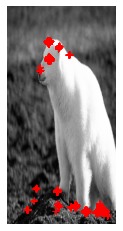

In [23]:
img = Image.open("beer.jpg").convert('L')
img_sj = cv2.resize(array(img), (300, 600))
him3 = harris_response(img_sj)
coords3 = harris_point(him3, 20, 0.3)
hplot(img_sj,coords3)

In [24]:
len(coords3)

1072

<ipython-input-14-fb88004876ab>:3: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  filters.gaussian_filter(im,(sigma, sigma), (0,1), imx)
<ipython-input-14-fb88004876ab>:5: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  filters.gaussian_filter(im, (sigma, sigma), (1,0), imy)
<ipython-input-14-fb88004876ab>:6: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  ixx = filters.gaussian_filter(imx*imx, sigma)
<ipython-input-14-fb88004876ab>:7: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  ixy = filters.gaussian_filter(imx*imy, sigma)
<ipython-input-14-fb88004876ab>:8: DeprecationWarning: Please use `gaussian_filter` from the `sci

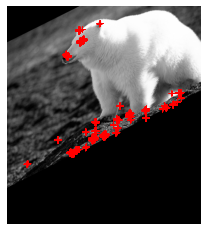

In [25]:
img = Image.open("beer.jpg").convert('L')
im_skos = img.transform((800,900),Image.AFFINE, (2,0,0,1,2,-300))
him4 = harris_response(array(im_skos))
coords4 = harris_point(him4, 20, 0.3)
hplot(im_skos,coords4)

In [26]:
len(coords4)

1838

In [27]:
#детектор FAST

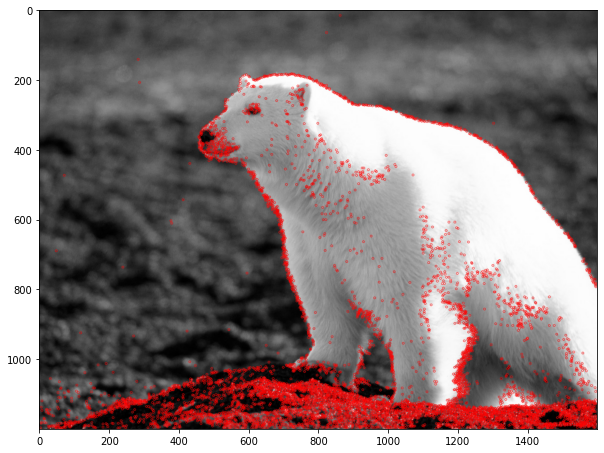

In [28]:
im00 = cv2.imread("beer.jpg", cv2.IMREAD_GRAYSCALE)
fast = cv2.FastFeatureDetector_create()
kp = fast.detect(im00, None)
img2 = cv2.drawKeypoints(im00, kp, None, color=(255,0,0))
plt.figure(figsize = (10,15))
plt.imshow(img2)

In [29]:
len(kp)

7265

In [30]:
#Примените библиотечные дескрипторы SIFT и OBR

In [31]:
!pip install opencv-contrib-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
sift = cv2.xfeatures2d.SIFT_create()

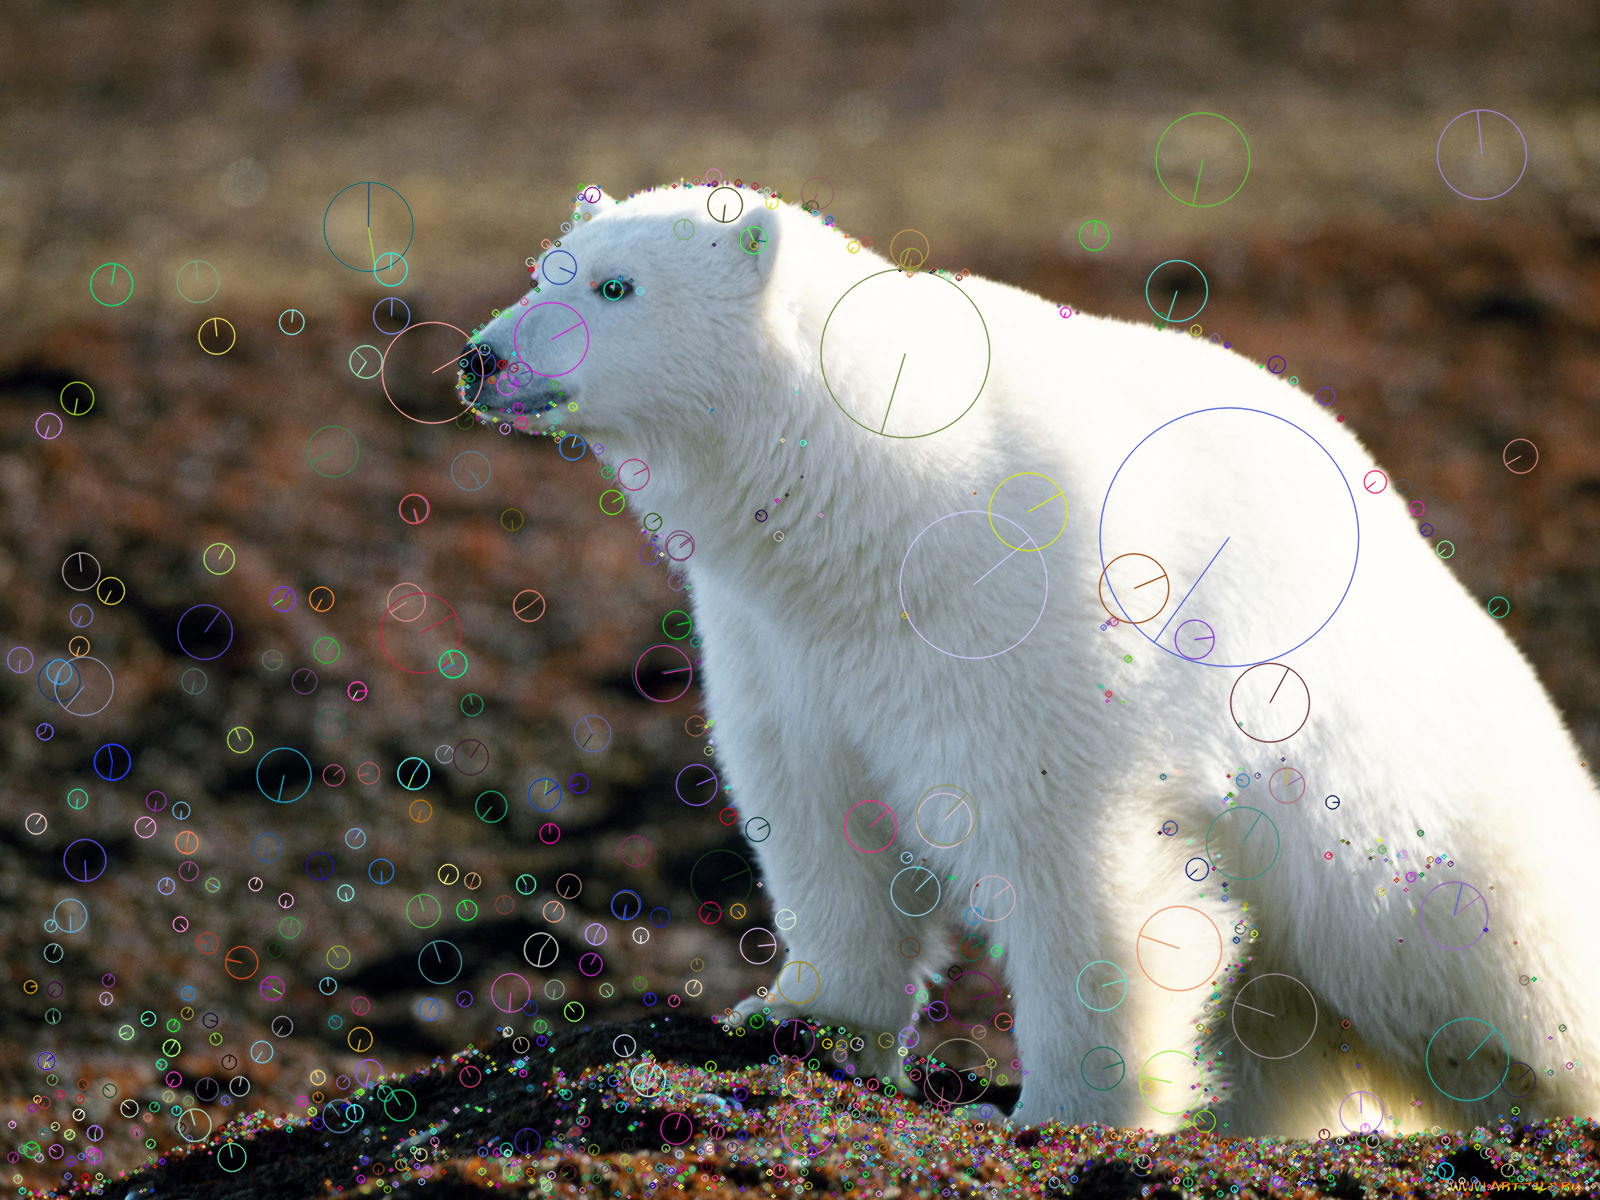

In [33]:
img = np.array(Image.open('beer.jpg'))
kp = sift.detect(np.array(img), None)
img_keypoints_nosize = cv2.drawKeypoints(np.array(img), kp, np.array(img),flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
Image.fromarray(img_keypoints_nosize)

In [34]:
len(kp)

3230

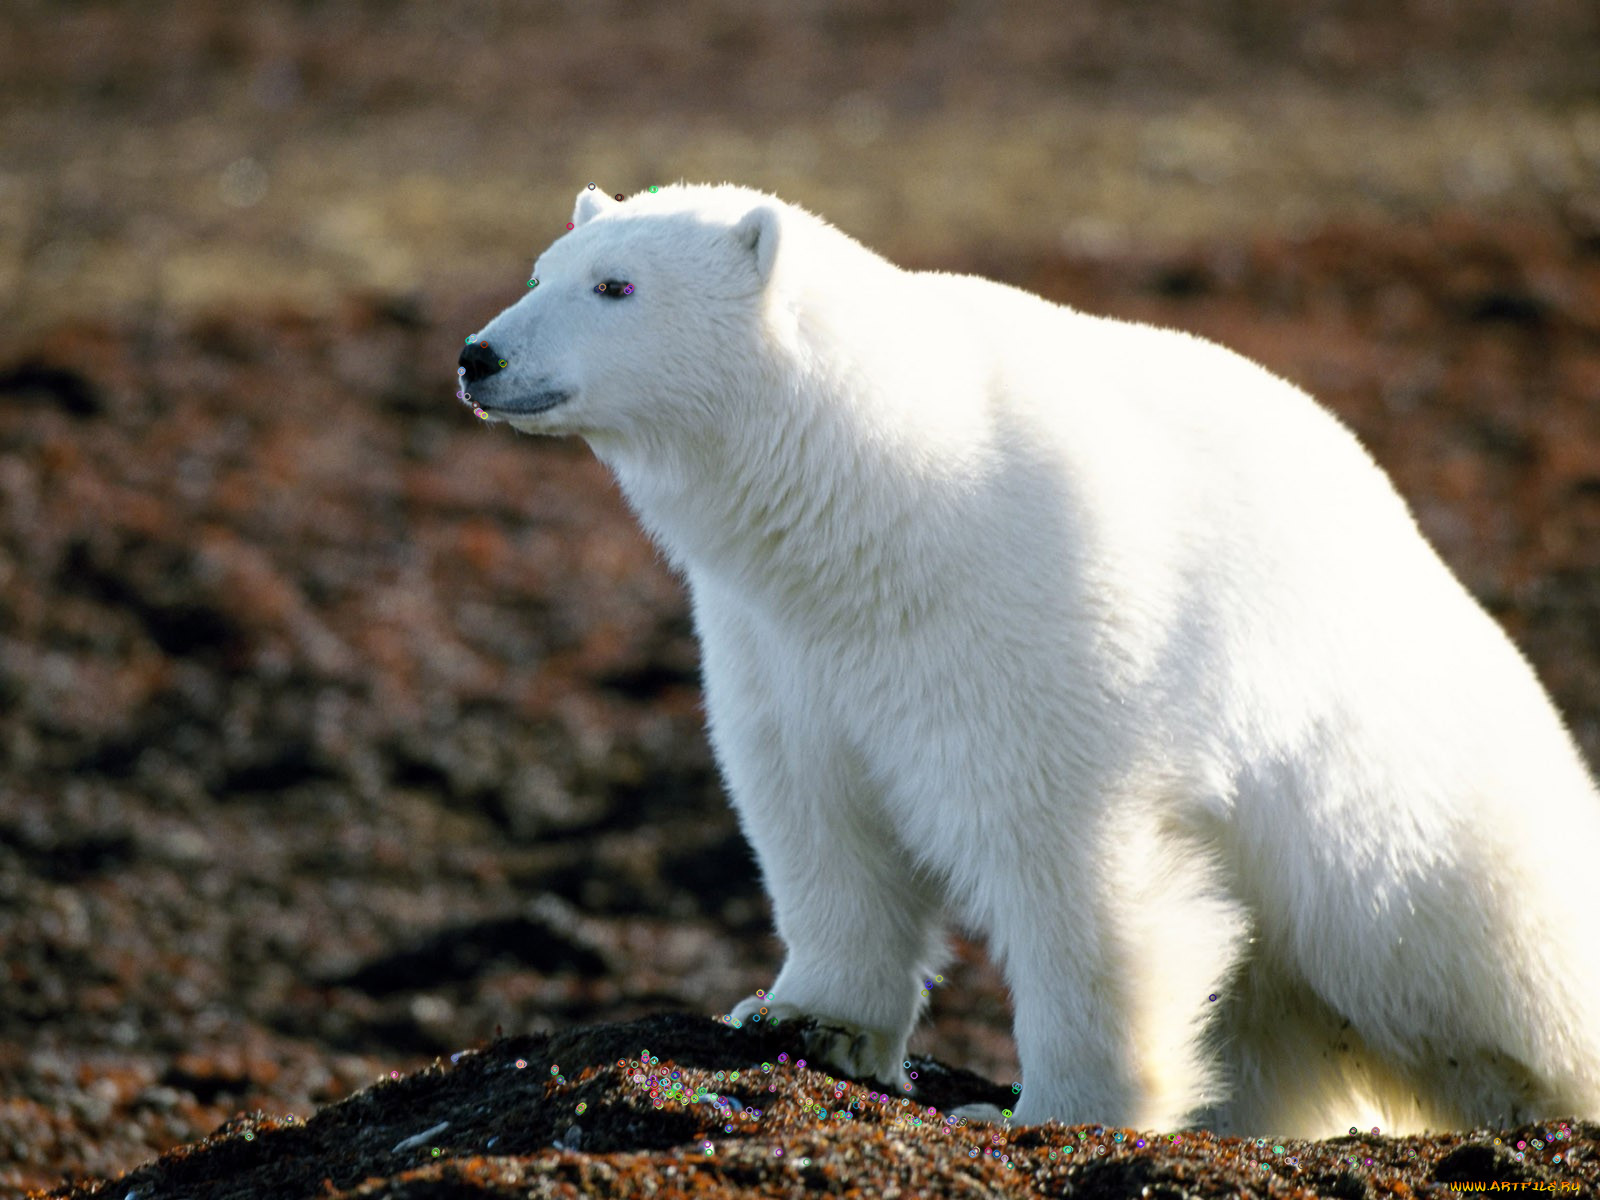

In [35]:
img = Image.open('beer.jpg')
im01 = cv2.imread("beer.jpg")
orb = cv2.ORB_create()
keypoints_orb, descriptors = orb.detectAndCompute(array(img), None)
img_orb = cv2.drawKeypoints(array(img),keypoints_orb,None)
Image.fromarray(img_orb)

In [36]:
len(keypoints_orb)

500

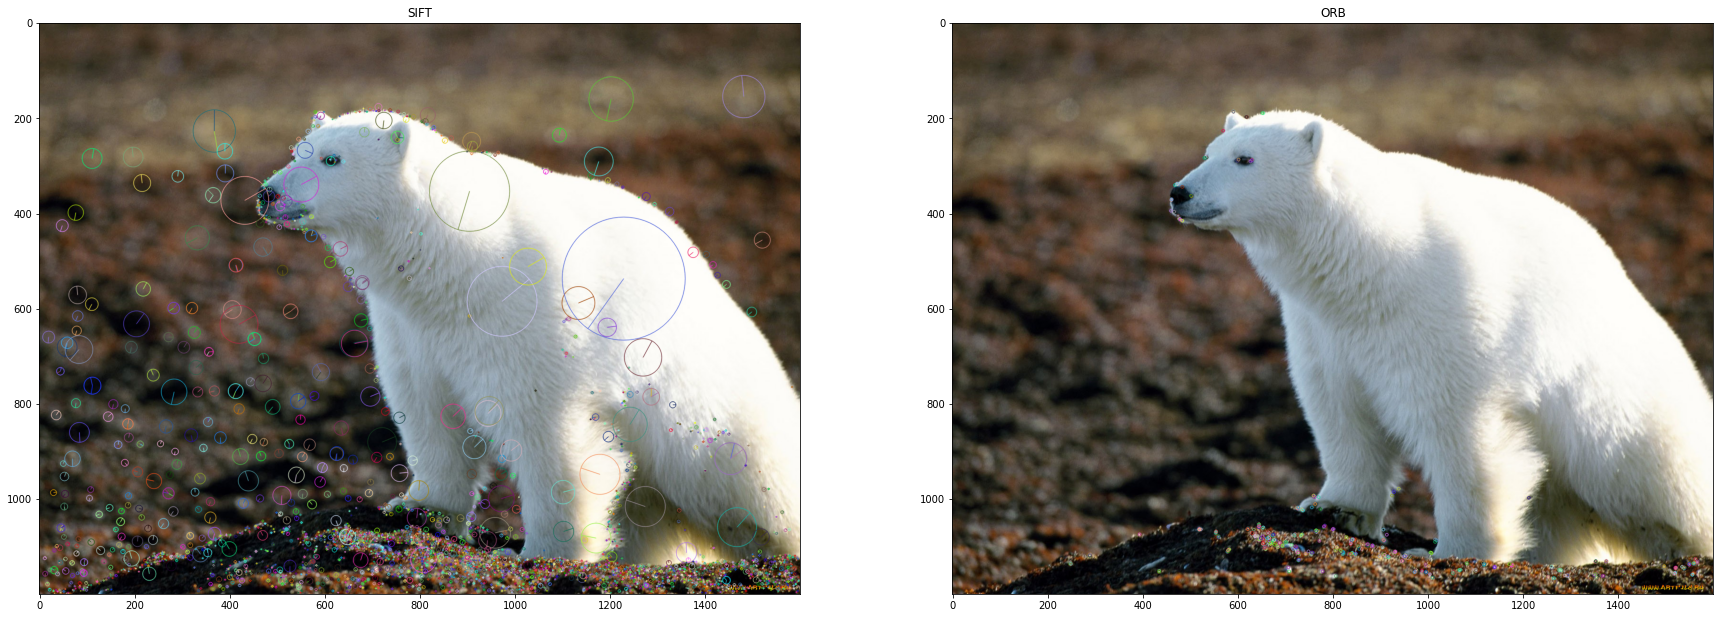

In [37]:
plt.figure(figsize=(30, 30))
subplot(1,2,1), imshow(img_keypoints_nosize)
title('SIFT')
subplot(1,2,2), imshow(img_orb)
title('ORB')
show()

In [38]:
#Найти границы Canny 

<ipython-input-39-8d759ae0f7d9>:7: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  filters.gaussian_filter(im, (s,s),(0,1),imx)
<ipython-input-39-8d759ae0f7d9>:9: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  filters.gaussian_filter(im, (s,s),(1,0),imy)
<ipython-input-39-8d759ae0f7d9>:20: DeprecationWarning: Please use `sobel` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  filters.sobel(im,1,imx2)
<ipython-input-39-8d759ae0f7d9>:22: DeprecationWarning: Please use `sobel` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  filters.sobel(im,0,imy2)
<ipython-input-39-8d759ae0f7d9>:28: DeprecationWarning: Please use `prewitt` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  filters.pr

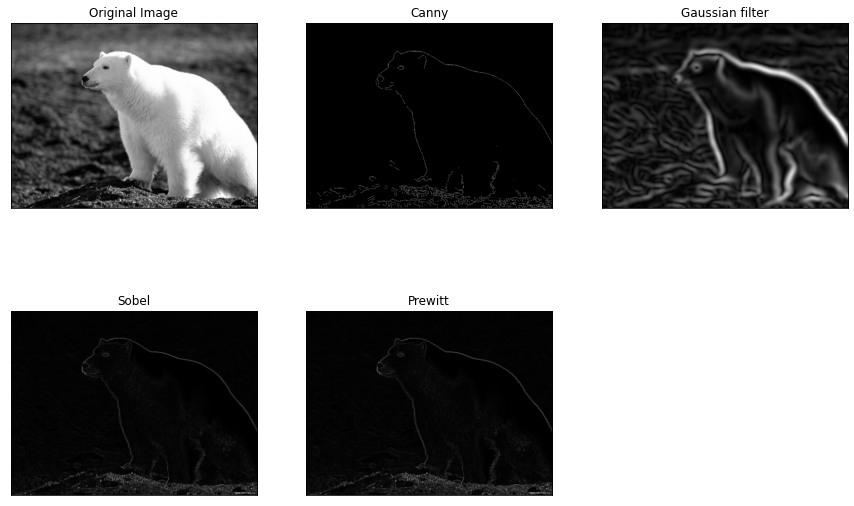

In [39]:
plt.figure(figsize=(15, 15))
im = array(Image.open("beer.jpg").convert('L'))
blur = cv2.blur(im,(15,15))
edges = cv2.Canny(blur,30,50)
s = 15
imx = zeros(im.shape)
filters.gaussian_filter(im, (s,s),(0,1),imx)
imy = zeros(im.shape)
filters.gaussian_filter(im, (s,s),(1,0),imy)
m = sqrt(imx**2+imy**2)

plt.subplot(331),plt.imshow(im,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(332),plt.imshow(edges,cmap = 'gray')
plt.title('Canny'), plt.xticks([]), plt.yticks([])
plt.subplot(333),plt.imshow(m,cmap = 'gray')
plt.title('Gaussian filter'), plt.xticks([]), plt.yticks([])

imx2 = zeros(im.shape)
filters.sobel(im,1,imx2)
imy2 = zeros(im.shape)
filters.sobel(im,0,imy2)
m2 = sqrt(imx2**2+imy2**2)
plt.subplot(334),plt.imshow(m2,cmap = 'gray')
plt.title('Sobel'), plt.xticks([]), plt.yticks([])

imx3 = zeros(im.shape)
filters.prewitt(im,1,imx3)
imy3 = zeros(im.shape)
filters.prewitt(im,0,imy3)
m3 = sqrt(imx3**2+imy3**2)
plt.subplot(335),plt.imshow(m3,cmap = 'gray')
plt.title('Prewitt'), plt.xticks([]), plt.yticks([])

plt.show()


<Figure size 432x288 with 0 Axes>

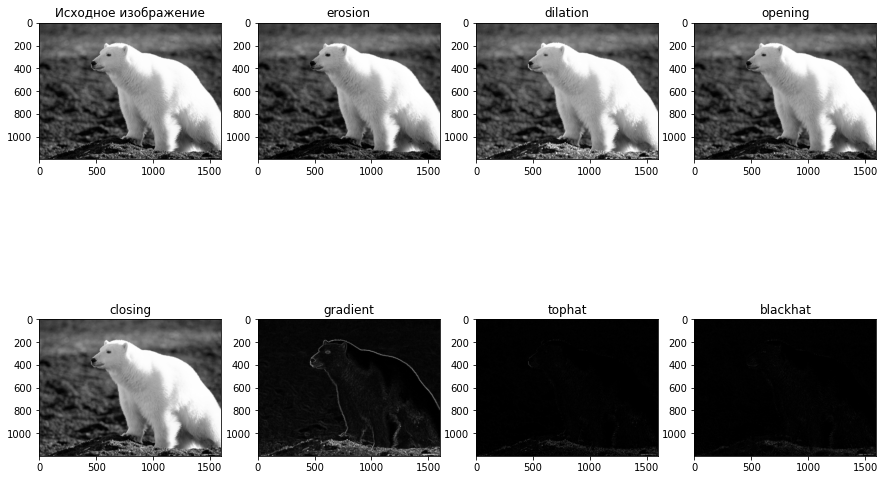

In [40]:
im=Image.open('beer.jpg')
img = array(im.convert('L'))
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
dilation = cv2.dilate(img,kernel,iterations = 1)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

figure()
plt.figure(figsize=(15, 10))
subplot(2,4,1), imshow(img, cmap="gray")
title('Исходное изображение')
subplot(2,4,2), imshow(erosion, cmap="gray")
title('erosion')
subplot(2,4,3), imshow(dilation, cmap="gray")
title('dilation')
subplot(2,4,4), imshow(opening, cmap="gray")
title('opening')
subplot(2,4,5), imshow(closing, cmap="gray")
title('closing')
subplot(2,4,6), imshow(gradient, cmap="gray")
title('gradient')
subplot(2,4,7), imshow(tophat, cmap="gray")
title('tophat')
subplot(2,4,8), imshow(blackhat, cmap="gray")
title('blackhat')
show()

In [41]:
# Для LAB1: выравнивание гистограммы

In [42]:
im8=array(Image.open('beer.jpg').convert('L'))
lab_planes = cv2.split(im8)
clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize=(10,10))
lab_planes[0] = clahe.apply(lab_planes[0])
lab = cv2.merge(lab_planes)
plt.figure(figsize=(10, 5))
subplot(1,2,1), imshow(np.array(lab), cmap="gray")
subplot(1,2,2), hist(lab.flatten(), 128)
show()

TypeError: ignored

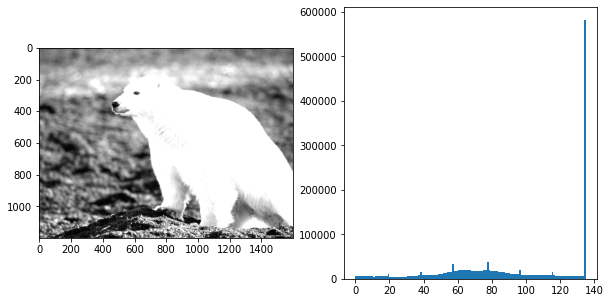

In [43]:
im8=array(Image.open('beer.jpg').convert('L'))
#im8 = im8.astype('uint8')
ret,thresh1 = cv2.threshold(im8,150,200,  10)
pim4 = Image.fromarray(thresh1)
plt.figure(figsize=(10, 5))
subplot(1,2,1), imshow(np.array(thresh1), cmap="gray")
subplot(1,2,2), hist(thresh1.flatten(), 128)
show()